## Parte I. Carga de datos

In [1]:
import pandas as pd

In [3]:
# Carga de datos desde la ruta en Colab
ruta_archivo = 'Data_ajustado.csv'
data = pd.read_csv(ruta_archivo)
data.head()

,Fecha,Presion,Temperatura,Volumen,Cliente,outlier_Presion_iqr,outlier_Temperatura_iqr,outlier_Volumen_iqr,outlier_cualquiera_iqr
0,2019-01-14 00:00:00,17.732563,28.209354,20.969751,CLIENTE1,False,False,False,False
1,2019-01-14 01:00:00,17.747776,28.518614,17.845739,CLIENTE1,False,False,False,False
2,2019-01-14 02:00:00,17.758916,28.230191,20.975914,CLIENTE1,False,False,False,False
3,2019-01-14 03:00:00,17.727940,27.811509,20.592299,CLIENTE1,False,False,False,False
4,2019-01-14 04:00:00,17.746484,27.795293,21.690626,CLIENTE1,False,False,False,False


In [5]:
cols_to_convert = ['outlier_Presion_iqr', 'outlier_Temperatura_iqr', 'outlier_Volumen_iqr','outlier_cualquiera_iqr']
data[cols_to_convert] = data[cols_to_convert].astype(int)
data.head()

,Fecha,Presion,Temperatura,Volumen,Cliente,outlier_Presion_iqr,outlier_Temperatura_iqr,outlier_Volumen_iqr,outlier_cualquiera_iqr
0,2019-01-14 00:00:00,17.732563,28.209354,20.969751,CLIENTE1,0,0,0,0
1,2019-01-14 01:00:00,17.747776,28.518614,17.845739,CLIENTE1,0,0,0,0
2,2019-01-14 02:00:00,17.758916,28.230191,20.975914,CLIENTE1,0,0,0,0
3,2019-01-14 03:00:00,17.727940,27.811509,20.592299,CLIENTE1,0,0,0,0
4,2019-01-14 04:00:00,17.746484,27.795293,21.690626,CLIENTE1,0,0,0,0


## Parte II. Clusterización de clientes

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

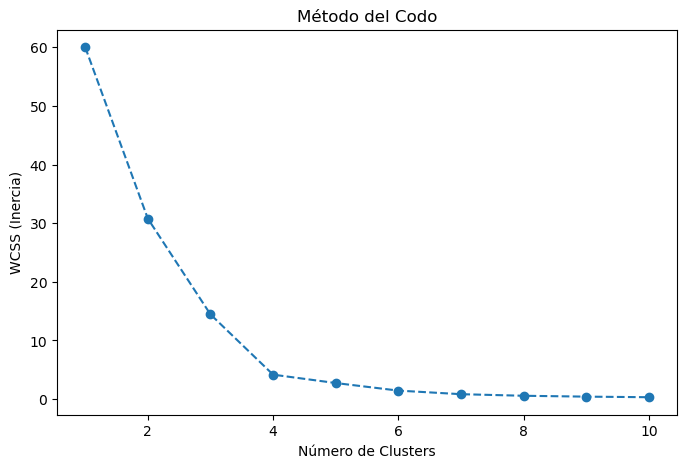

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Seleccionar las columnas de interés para segmentación
variables = ['Presion', 'Temperatura', 'Volumen']
segmentation_data = data.groupby('Cliente')[variables].mean()  

# Escalar los datos
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data)

# Encontrar el número óptimo de clusters usando el método del codo
wcss = []  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(segmentation_data_scaled)
    wcss.append(kmeans.inertia_)

# Grafica método del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Inercia)')
plt.show()

In [10]:
# Elegir un número óptimo de clusters
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
segmentation_data['Cluster'] = kmeans.fit_predict(segmentation_data_scaled)

# Mostrar los resultados
segmentation_data

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Presion,Temperatura,Volumen,Cluster
Cliente,,,,
CLIENTE1,17.535934,25.575853,19.976401,3
CLIENTE10,17.473694,23.500489,11.788209,1
CLIENTE11,3.545512,26.307152,131.648637,2
CLIENTE12,17.833667,26.689551,33.731496,3
CLIENTE13,17.492521,21.591365,10.276088,1
CLIENTE14,17.517128,26.658520,7.301900,3
CLIENTE15,17.495812,24.026489,12.553861,1
CLIENTE16,16.705058,27.481311,178.133946,0
CLIENTE17,17.533599,25.849342,20.564425,3


In [12]:
#Agregar etiquetas a los clientes
data= data.merge(segmentation_data[['Cluster']], left_on='Cliente', right_index=True, how='left')
data.head()

,Fecha,Presion,Temperatura,Volumen,Cliente,outlier_Presion_iqr,outlier_Temperatura_iqr,outlier_Volumen_iqr,outlier_cualquiera_iqr,Cluster
0,2019-01-14 00:00:00,17.732563,28.209354,20.969751,CLIENTE1,0,0,0,0,3
1,2019-01-14 01:00:00,17.747776,28.518614,17.845739,CLIENTE1,0,0,0,0,3
2,2019-01-14 02:00:00,17.758916,28.230191,20.975914,CLIENTE1,0,0,0,0,3
3,2019-01-14 03:00:00,17.727940,27.811509,20.592299,CLIENTE1,0,0,0,0,3
4,2019-01-14 04:00:00,17.746484,27.795293,21.690626,CLIENTE1,0,0,0,0,3


### Grafica para visualizar clasificación

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

def visualizar_cluster(X_scaled, anomalia_columna='Anomalia'):
    if isinstance(X_scaled, np.ndarray):
        raise TypeError("X_scaled debe ser un DataFrame, no un ndarray.")
        
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled.drop(columns=[anomalia_columna]))

    df_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=X_scaled.index)
    df_plot[anomalia_columna] = X_scaled[anomalia_columna]

    # Definir colores personalizados
    colores = {
        0: ('Normal', 'steelblue'),
        1: ('Anomalia', 'crimson')
    }

    plt.figure(figsize=(9, 7))
    for clase in df_plot[anomalia_columna].unique():
        etiqueta, color = colores.get(clase, (f'Clase {clase}', 'gray'))
        subset = df_plot[df_plot[anomalia_columna] == clase]
        plt.scatter(
            subset['PC1'], subset['PC2'],
            label=etiqueta,
            color=color,
            alpha=0.7,
            edgecolor='k',
            s=50
        )

    plt.legend()
    plt.title('Visualización de Anomalías por PCA', fontsize=14)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Parte III. Ajustar modelos Isolation forest por cada cluster

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score
import joblib

def ajuste_parametros(data, parameters, cluster, outlier):

    # Filtrar solo donde Cluster == cluster
    subset = data[data['Cluster'] == cluster]
    
    # Definir features y etiquetas
    features = ['Presion', 'Temperatura', 'Volumen']
    X = subset[features]
    y = subset[outlier]
    
    # Dividir en train y test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y)
    
    mejor_accuracy = 0
    mejor_modelo = None
    mejor_n = None
    mejor_cont = None

    for n in parameters["n_estimators"]:
        for cont in parameters["contamination"]:
            # Entrenar con X_train
            model = IsolationForest(n_estimators=n, contamination=cont, random_state=42)
            model.fit(X_train)
            
            # Predecir en los datos de prueba
            y_pred = model.predict(X_test)

            y_pred = (y_pred == -1).astype(int)

            acc=accuracy_score(y_test, y_pred)
                
            if acc > mejor_accuracy:
                mejor_accuracy = acc
                mejor_modelo = model
                mejor_n = n
                mejor_cont = cont
        
    print(f"Mejor accuracy para el Cluster {cluster}: {mejor_accuracy:.4f}")
    print(f"Mejor combinación: n_estimators = {mejor_n}, contamination = {mejor_cont}")

    #Guardar modelo para usar en el tablero de predicción
    #nombre='modelo_isolation_cluster_' + str(cluster) + '.pkl'
    #joblib.dump(mejor_modelo, nombre)

    X_test['Anomalia'] = y_pred

    # Visualización de las anomalías usando PCA
    visualizar_cluster(X_test, anomalia_columna='Anomalia')
        
    return mejor_modelo


In [ ]:
parameters={"n_estimators":[100,200,300,500],
           "contamination":[0.01,0.05,0.1]}


cluster=data['Cluster'].unique().tolist()
cluster.sort()

#La métrica se calcula vs un outlier determinado
outlier='outlier_cualquiera_iqr'

for i in cluster:
    print(f"Busqueda mejores parámetros Cluster {i}")
    ajuste_parametros(data, parameters, i, outlier)
    print("_____________________________________________________________")

## Parte IV. Ajustar modelos HDBSCAN por cada cluster

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from hdbscan import HDBSCAN, approximate_predict
from itertools import product

def ajuste_cluster(data, cluster, outlier, param_grid):
    subset = data[data['Cluster'] == cluster]

    features = ['Presion', 'Temperatura', 'Volumen']
    X = subset[features]
    y = subset[outlier]

    # Dividir en train y test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    mejor_acc = 0
    mejores_param = None
    mejor_modelo = None
    mejor_scaler = None

    # Generar combinaciones de parámetros
    keys, values = zip(*param_grid.items())
    combinaciones = [dict(zip(keys, v)) for v in product(*values)]

    for params in combinaciones:
        model = HDBSCAN(**params, prediction_data=True)
        model.fit(X_train_scaled)

        # Validar que haya más de un clúster real
        if len(set(model.labels_)) <= 1:
            continue

        labels, strengths = approximate_predict(model, X_test_scaled)
        etiquetas_reasignadas = (labels == -1).astype(int)  # 1 = anormal, 0 = normal

        acc = accuracy_score(y_test, etiquetas_reasignadas)

        if acc > mejor_acc:
            mejor_acc = acc
            mejores_param = params
            mejor_modelo = model
            mejor_scaler = scaler

    print(f"[Cluster {cluster}] Mejor accuracy: {mejor_acc:.4f}")
    print("Parámetros óptimos:", mejores_param)

    # Visualizar resultados con mejor modelo
    X_test_df = pd.DataFrame(X_test_scaled, columns=features, index=X_test.index)
    labels, _ = approximate_predict(mejor_modelo, X_test_scaled)
    X_test_df['Anomalia'] = (labels == -1).astype(int)

    visualizar_cluster(X_test_df)

    return mejor_modelo, mejor_scaler


Busqueda mejores parámetros Cluster 0
[Cluster 0] Mejor accuracy: 0.9099
Parámetros óptimos: {'min_cluster_size': 20, 'min_samples': 10, 'alpha': 1.5, 'metric': 'euclidean', 'cluster_selection_method': 'eom'}


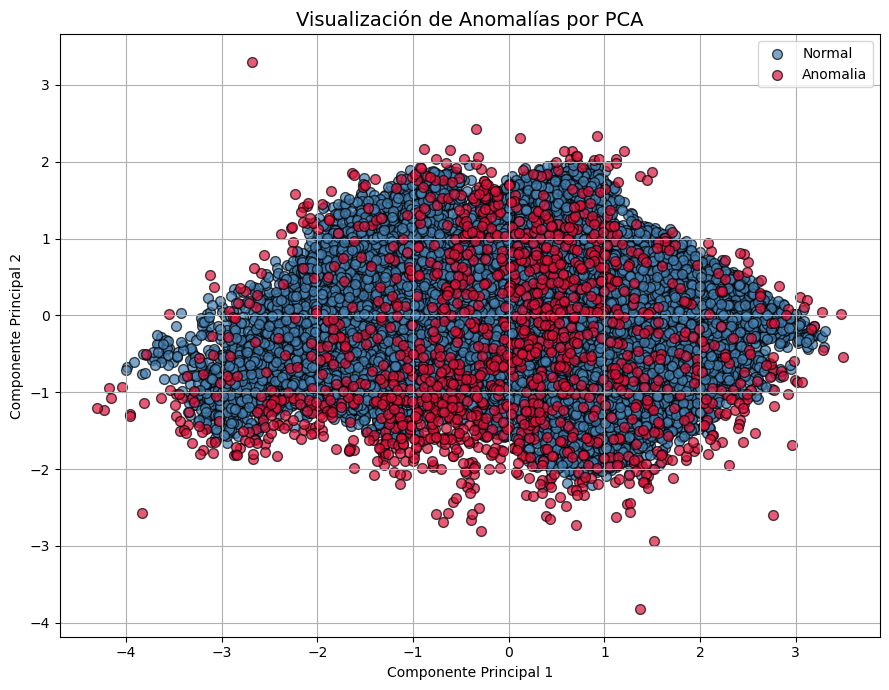

_____________________________________________________________
Busqueda mejores parámetros Cluster 1
[Cluster 1] Mejor accuracy: 0.7376
Parámetros óptimos: {'min_cluster_size': 50, 'min_samples': 10, 'alpha': 1.5, 'metric': 'euclidean', 'cluster_selection_method': 'eom'}


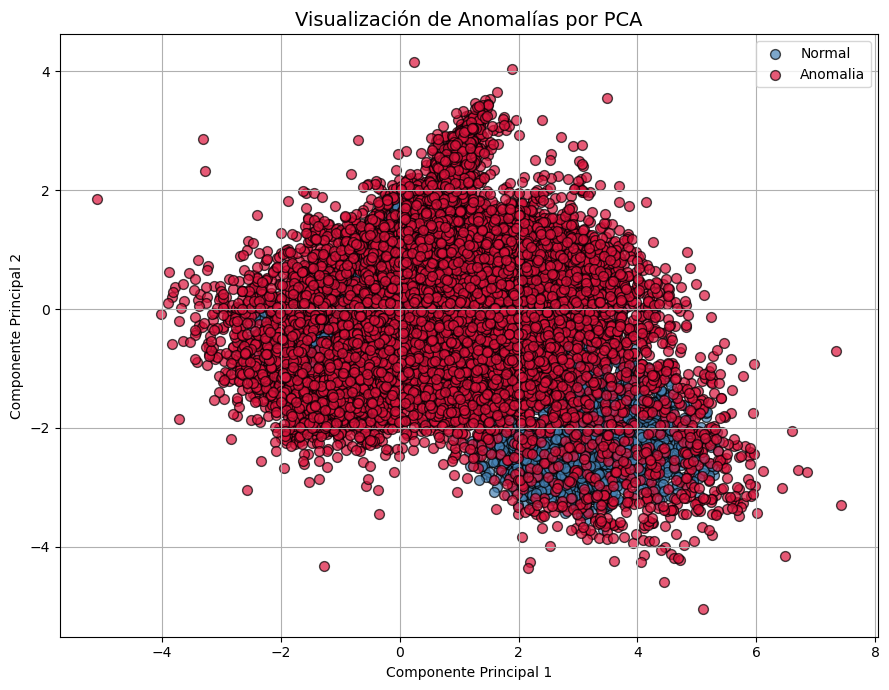

_____________________________________________________________
Busqueda mejores parámetros Cluster 2
[Cluster 2] Mejor accuracy: 0.8885
Parámetros óptimos: {'min_cluster_size': 20, 'min_samples': 10, 'alpha': 1.5, 'metric': 'euclidean', 'cluster_selection_method': 'eom'}


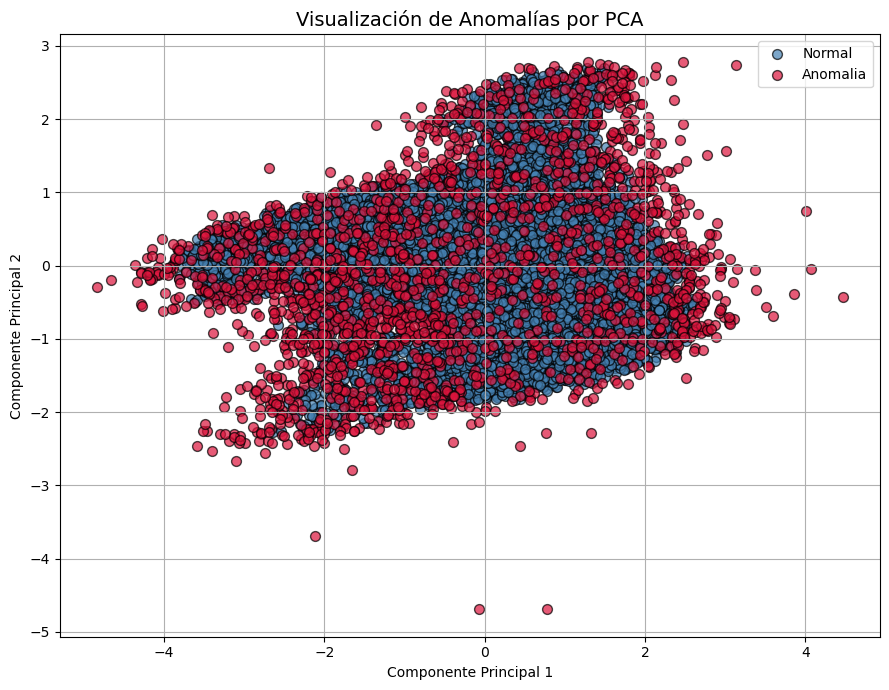

_____________________________________________________________
Busqueda mejores parámetros Cluster 3
[Cluster 3] Mejor accuracy: 0.8426
Parámetros óptimos: {'min_cluster_size': 20, 'min_samples': 10, 'alpha': 1.5, 'metric': 'euclidean', 'cluster_selection_method': 'eom'}


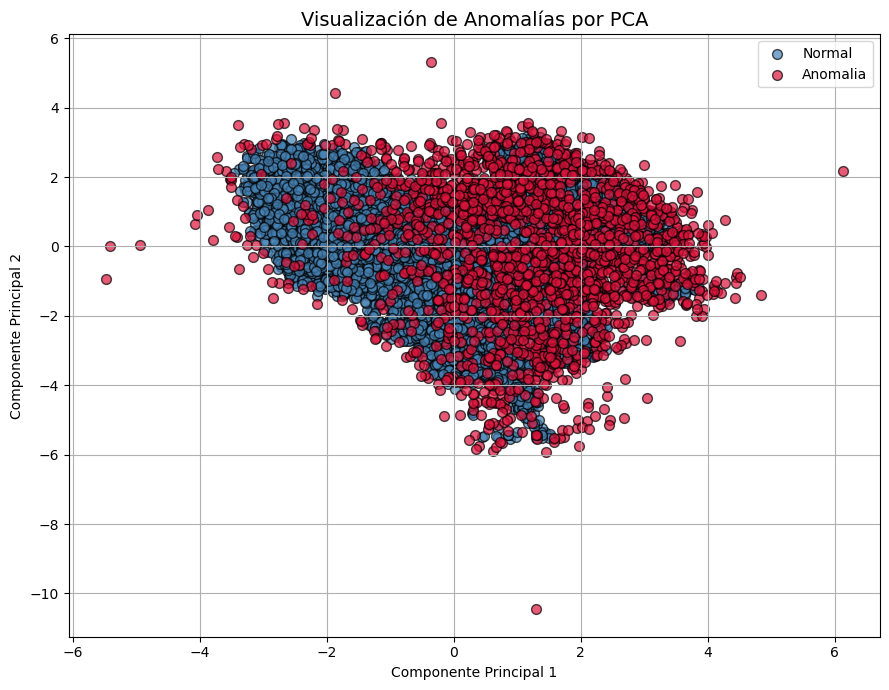

_____________________________________________________________


In [20]:
param_grid = {
    'min_cluster_size': [20, 50],
    'min_samples': [10, 20],
    'alpha': [1.5, 1.9],
    'metric': ['euclidean'],
    'cluster_selection_method': ['eom']
}

cluster=data['Cluster'].unique().tolist()
cluster.sort()
#La métrica se calcula vs un outlier determinado
outlier='outlier_cualquiera_iqr'

for i in cluster:
    print(f"Busqueda mejores parámetros Cluster {i}")
    ajuste_cluster(data, i, outlier, param_grid)
    print("_____________________________________________________________")